In [1]:
from read_roi import read_roi_file
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os.path import join

In [2]:
#fill the path to your outline.roi file here
basefd = r"D:\localData\trace_pipe_DJ\4090\retina_recon"

# IMPORTANT FILL THIS FOR EVERY IMAGE
picheight = 5328

roi_path = join(basefd, 'outline.roi')
#fill the path you want to save P.csv here
cpath =join(basefd, 'P.csv')

roi_data = read_roi_file(roi_path)

#extract coordinates of the polygon
for name, roi in roi_data.items():
    print(type(roi))
    print(type(name))
    x_coordinates = roi.get('x', [])
    y_coordinates = roi.get('y', [])
    print(f"ROI Name: {name}")
    print("X Coordinates:", x_coordinates)
    print("Y Coordinates:", y_coordinates)



<class 'dict'>
<class 'str'>
ROI Name: outline
X Coordinates: [6152, 6464, 6656, 6664, 6776, 6832, 6384, 6136, 6032, 5920, 6032, 5744, 5424, 5096, 4560, 4456, 4328, 3912, 3736, 3320, 2928, 2872, 3288, 3336, 3040, 2744, 2704, 2496, 2408, 2424, 2664, 2664, 2728, 2944, 3136, 3280, 3576, 4000, 4256, 4448, 4592, 4792, 4688, 4984, 4944, 5152, 5528, 5896, 6032]
Y Coordinates: [1144, 1624, 2184, 2512, 2896, 3184, 3352, 3480, 3504, 3728, 4256, 4672, 4936, 4896, 4872, 4792, 4552, 4960, 5024, 4808, 4496, 4328, 3824, 3520, 3600, 3472, 3320, 3112, 3032, 2816, 2632, 2080, 1776, 1648, 1056, 944, 1064, 1408, 1592, 1912, 1984, 1712, 1328, 1192, 984, 720, 648, 704, 1008]


In [3]:
#generate your P.csv file
data = {'X':np.array(x_coordinates), 'Y':picheight - np.array(y_coordinates)}
outlines = pd.DataFrame(data = data)
outlines.to_csv(cpath,index = False)

(np.float64(2186.8),
 np.float64(7053.2),
 np.float64(85.19999999999999),
 np.float64(4898.8))

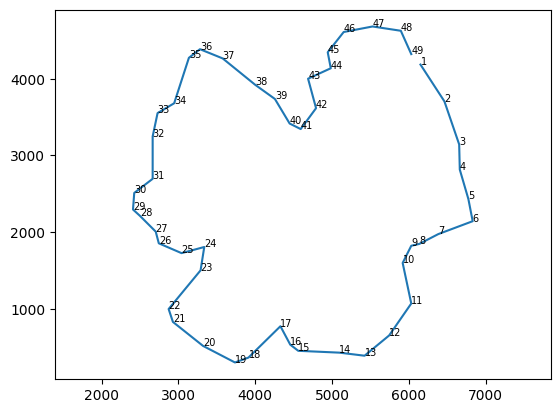

In [4]:
y_plots = np.array(picheight - np.array(y_coordinates))
#because the Y coordinates in the imageJ is flipped compared to regular coordinate system, e.g. pixel(0,0) is the upper left point not the lower left point. 
x_coordinates = np.array(x_coordinates)

#making plots
fig, ax = plt.subplots()
ax.plot(x_coordinates,y_plots)
for i in range(len(x_coordinates)):
    ax.text(x_coordinates[i], y_plots[i], str(i+1), fontsize = 7)

ax.axis('equal')

In [7]:
#added on 0818
#azimuth-equal-distance reprojection in python, special calculation because of RETISTRUCT
#DO NOT GENERALIZE
def aziEq_reproj(labmda, phi):
    rho = (np.pi/2)+phi
    x = np.multiply(rho, np.cos(labmda))
    y = np.multiply(rho, np.sin(labmda))
    return x,y
    

In [4]:

sphe_csv = join(basefd, 'RGCspherical.csv')
sphe_df = pd.read_csv(sphe_csv)

In [5]:
lam = sphe_df['RGC.lambda'].to_numpy()
phi = sphe_df['RGC.phi'].to_numpy()

In [8]:
x, y = aziEq_reproj(lam, phi)

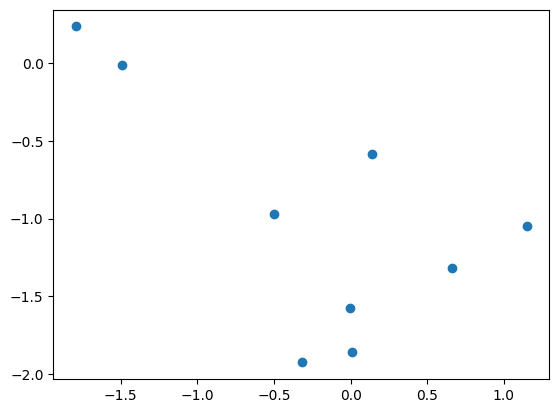

In [9]:
plt.scatter(x, y)

reproj_df = pd.DataFrame({'x':x, 'y':y})
cartePath = join(basefd, 'RGCcarte.csv')
reproj_df.to_csv(cartePath)
